# Combine Grayscale Images into RGB Images

In [6]:
import os
import pandas as pd
from PIL import Image
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
from sklearn.metrics import balanced_accuracy_score


def combine_images_to_rgb(id, base_path, output_path):
    try:
        nucleus_path = os.path.join(base_path, f"{id:05d}_blue.png")
        microtubules_path = os.path.join(base_path, f"{id:05d}_red.png")
        er_path = os.path.join(base_path, f"{id:05d}_yellow.png")

        nucleus = Image.open(nucleus_path).convert("L")
        microtubules = Image.open(microtubules_path).convert("L")
        er = Image.open(er_path).convert("L")
        
        rgb_image = Image.merge("RGB", (nucleus, microtubules, er))
        
        nucleus.close()
        microtubules.close()
        er.close()

        output_file_path = os.path.join(output_path, f"{id:05d}_combined.png")
        rgb_image.save(output_file_path)
        
        print(f"Saved combined image to {output_file_path}")
        return output_file_path
    except Exception as e:
        print(f"Error combining images for ID {id}: {e}")
        return None

labels = pd.read_csv("y_train.csv")

output_path = "combined_data"
if not os.path.exists(output_path):
    os.makedirs(output_path)

base_path = "images_train"
for sample_id in labels['file_id']:
    combine_images_to_rgb(sample_id, base_path, output_path)


Saved combined image to combined_data\00001_combined.png
Saved combined image to combined_data\00002_combined.png
Saved combined image to combined_data\00003_combined.png
Saved combined image to combined_data\00004_combined.png
Saved combined image to combined_data\00005_combined.png
Saved combined image to combined_data\00006_combined.png
Saved combined image to combined_data\00007_combined.png
Saved combined image to combined_data\00008_combined.png
Saved combined image to combined_data\00009_combined.png
Saved combined image to combined_data\00010_combined.png
Saved combined image to combined_data\00011_combined.png
Saved combined image to combined_data\00012_combined.png
Saved combined image to combined_data\00013_combined.png
Saved combined image to combined_data\00014_combined.png
Saved combined image to combined_data\00015_combined.png
Saved combined image to combined_data\00016_combined.png
Saved combined image to combined_data\00017_combined.png
Saved combined image to combine

# Code to Check and Re-save Imagesave_images(output_path)


In [7]:
def check_and_resave_images(directory):
    for filename in os.listdir(directory):
        if filename.endswith("_combined.png"):
            file_path = os.path.join(directory, filename)
            try:
                img = Image.open(file_path)
                img.verify()
                
                img = Image.open(file_path)
                img = img.convert("RGB")
                
                img.save(file_path)
                print(f"Verified and re-saved {file_path}")
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

output_path = "combined_data"
check_and_resave_images(output_path)


Verified and re-saved combined_data\00001_combined.png
Verified and re-saved combined_data\00002_combined.png
Verified and re-saved combined_data\00003_combined.png
Verified and re-saved combined_data\00004_combined.png
Verified and re-saved combined_data\00005_combined.png
Verified and re-saved combined_data\00006_combined.png
Verified and re-saved combined_data\00007_combined.png
Verified and re-saved combined_data\00008_combined.png
Verified and re-saved combined_data\00009_combined.png
Verified and re-saved combined_data\00010_combined.png
Verified and re-saved combined_data\00011_combined.png
Verified and re-saved combined_data\00012_combined.png
Verified and re-saved combined_data\00013_combined.png
Verified and re-saved combined_data\00014_combined.png
Verified and re-saved combined_data\00015_combined.png
Verified and re-saved combined_data\00016_combined.png
Verified and re-saved combined_data\00017_combined.png
Verified and re-saved combined_data\00018_combined.png
Verified a

# Load Labels and Split Data

In [2]:
labels_df = pd.read_csv("y_train.csv")

cell_lines = labels_df['cell_line'].unique()
label_map = {cell_line: idx for idx, cell_line in enumerate(cell_lines)}
labels_df['label'] = labels_df['cell_line'].map(label_map)

train_ids, val_ids, train_labels, val_labels = train_test_split(
    labels_df['file_id'], labels_df['label'], test_size=0.2, random_state=42, stratify=labels_df['label']
)

print(f"Train IDs shape: {train_ids.shape}")
print(f"Validation IDs shape: {val_ids.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Validation labels shape: {val_labels.shape}")


Train IDs shape: (7705,)
Validation IDs shape: (1927,)
Train labels shape: (7705,)
Validation labels shape: (1927,)


# Dataset Class and DataLoader

In [3]:
class CellDataset(Dataset):
    def __init__(self, ids, labels, base_path, transform=None):
        self.ids = ids
        self.labels = labels
        self.base_path = base_path
        self.transform = transform

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        id = self.ids.iloc[idx]
        image_path = os.path.join(self.base_path, f"{id:05d}_combined.png")
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = self.labels.iloc[idx]
        return image, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = CellDataset(train_ids, train_labels, base_path="combined_data", transform=transform)
val_dataset = CellDataset(val_ids, val_labels, base_path="combined_data", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"Train dataset length: {len(train_dataset)}")
print(f"Validation dataset length: {len(val_dataset)}")


Train dataset length: 7705
Validation dataset length: 1927


# Load and Train EfficentNet Model

Using device: cuda


Epoch 1/10:   0%|          | 0/241 [00:00<?, ?batch/s]

Epoch 1, Loss: 1.1567002301146876


Validation:   0%|          | 0/61 [00:00<?, ?batch/s]

Validation Accuracy: 83.75713544369486%
Balanced Accuracy: 79.91%


C:\ProgramData\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 2/10:   0%|          | 0/241 [00:00<?, ?batch/s]

Epoch 2, Loss: 0.40656851572119845


Validation:   0%|          | 0/61 [00:00<?, ?batch/s]

Validation Accuracy: 89.93253762324858%
Balanced Accuracy: 88.05%


C:\ProgramData\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 3/10:   0%|          | 0/241 [00:00<?, ?batch/s]

Epoch 3, Loss: 0.21322402174109245


Validation:   0%|          | 0/61 [00:00<?, ?batch/s]

Validation Accuracy: 92.4234561494551%
Balanced Accuracy: 90.76%


C:\ProgramData\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 4/10:   0%|          | 0/241 [00:00<?, ?batch/s]

Epoch 4, Loss: 0.13027743169751899


Validation:   0%|          | 0/61 [00:00<?, ?batch/s]

Validation Accuracy: 92.4234561494551%
Balanced Accuracy: 90.84%


C:\ProgramData\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 5/10:   0%|          | 0/241 [00:00<?, ?batch/s]

Epoch 5, Loss: 0.08778426819384345


Validation:   0%|          | 0/61 [00:00<?, ?batch/s]

Validation Accuracy: 93.87649195640893%
Balanced Accuracy: 92.57%


C:\ProgramData\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 6/10:   0%|          | 0/241 [00:00<?, ?batch/s]

Epoch 6, Loss: 0.05980160238638644


Validation:   0%|          | 0/61 [00:00<?, ?batch/s]

Validation Accuracy: 93.92838609237157%
Balanced Accuracy: 92.47%


C:\ProgramData\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 7/10:   0%|          | 0/241 [00:00<?, ?batch/s]

Epoch 7, Loss: 0.0480738332605229


Validation:   0%|          | 0/61 [00:00<?, ?batch/s]

Validation Accuracy: 94.08406850025948%
Balanced Accuracy: 92.77%


C:\ProgramData\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 8/10:   0%|          | 0/241 [00:00<?, ?batch/s]

Epoch 8, Loss: 0.042420083204771225


Validation:   0%|          | 0/61 [00:00<?, ?batch/s]

Validation Accuracy: 93.35755059678256%
Balanced Accuracy: 91.60%


C:\ProgramData\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 9/10:   0%|          | 0/241 [00:00<?, ?batch/s]

Epoch 9, Loss: 0.04375145346635404


Validation:   0%|          | 0/61 [00:00<?, ?batch/s]

Validation Accuracy: 93.20186818889465%
Balanced Accuracy: 91.97%


C:\ProgramData\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 10/10:   0%|          | 0/241 [00:00<?, ?batch/s]

Epoch 10, Loss: 0.03386178827618492


Validation:   0%|          | 0/61 [00:00<?, ?batch/s]

Validation Accuracy: 94.08406850025948%
Balanced Accuracy: 92.52%


C:\ProgramData\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


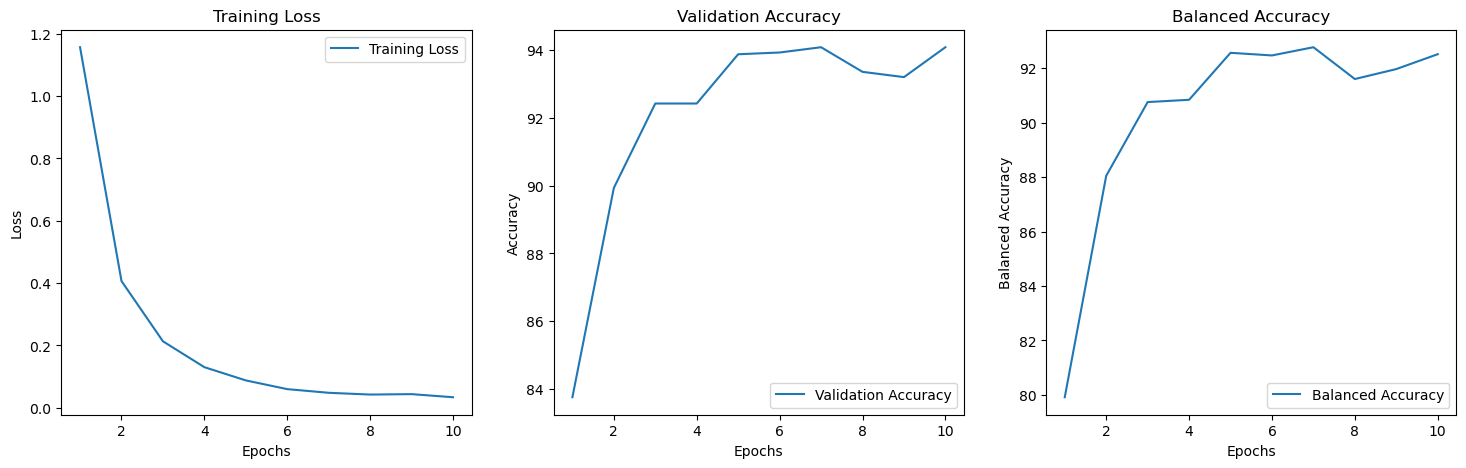

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = models.efficientnet_b0(pretrained=True)

num_classes = 9
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

train_losses = []
val_accuracies = []
balanced_accuracies = []

epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    train_loader = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch")

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        train_loader.set_postfix(loss=running_loss/len(train_loader))

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_train_loss}")

    model.eval()
    correct = 0
    total = 0
    all_true_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation", unit="batch"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

  
            all_predictions.extend(predicted.cpu().numpy())
            all_true_labels.extend(labels.cpu().numpy())

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    balanced_acc = balanced_accuracy_score(all_true_labels, all_predictions)
    balanced_accuracies.append(balanced_acc * 100)
    print(f"Validation Accuracy: {val_accuracy}%")
    print(f"Balanced Accuracy: {balanced_acc * 100:.2f}%")
    scheduler.step(avg_train_loss)

    torch.save(model.state_dict(), f"efficientnet_model_epoch_{epoch+1}.pth")


plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(1, epochs+1), balanced_accuracies, label='Balanced Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy')
plt.legend()

plt.show()


# Combine Test Images

In [12]:
test_base_path = "images_test"
combined_test_path = "combined_data_test"
if not os.path.exists(combined_test_path):
    os.makedirs(combined_test_path)

test_ids = [int(f.split('_')[0]) for f in os.listdir(test_base_path) if f.endswith('_blue.png')]

for test_id in tqdm(test_ids, desc="Combining test images"):
    combine_images_to_rgb(test_id, test_base_path, combined_test_path)

Combining test images:   0%|          | 0/6869 [00:00<?, ?it/s]

Saved combined image to combined_data_test\09633_combined.png
Saved combined image to combined_data_test\09634_combined.png
Saved combined image to combined_data_test\09635_combined.png
Saved combined image to combined_data_test\09636_combined.png
Saved combined image to combined_data_test\09637_combined.png
Saved combined image to combined_data_test\09638_combined.png
Saved combined image to combined_data_test\09639_combined.png
Saved combined image to combined_data_test\09640_combined.png
Saved combined image to combined_data_test\09641_combined.png
Saved combined image to combined_data_test\09642_combined.png
Saved combined image to combined_data_test\09643_combined.png
Saved combined image to combined_data_test\09644_combined.png
Saved combined image to combined_data_test\09645_combined.png
Saved combined image to combined_data_test\09646_combined.png
Saved combined image to combined_data_test\09647_combined.png
Saved combined image to combined_data_test\09648_combined.png
Saved co

# Load the saved model from the 7th epoch

In [20]:
checkpoint_path = "efficientnet_model_epoch_7.pth"
model.load_state_dict(torch.load(checkpoint_path))
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

# Predictions

In [21]:

class TestCellDataset(Dataset):
    def __init__(self, ids, base_path, transform=None):
        self.ids = ids
        self.base_path = base_path
        self.transform = transform

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        id = self.ids[idx]
        image_path = os.path.join(self.base_path, f"{id:05d}_combined.png")
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return id, image


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_dataset = TestCellDataset(test_ids, base_path=combined_test_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

label_map_reverse = {v: k for k, v in label_map.items()}

results = []

model.eval()
with torch.no_grad():
    for ids, images in tqdm(test_loader, desc="Predicting"):
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predicted = predicted.cpu().numpy()
        for id, pred in zip(ids.numpy(), predicted):
            results.append((id, label_map_reverse[pred]))

results_df = pd.DataFrame(results, columns=["file_id", "cell_line"])
results_df.to_csv("predictions_efficientnet.csv", index=False)
print("Predictions saved to predictions_efficientnet.csv")

Predicting:   0%|          | 0/215 [00:00<?, ?it/s]

Predictions saved to predictions_efficientnet.csv
